# Metodos Numericos - Laboratorio 5 - Derivación e Integración Numérica

Grupo 9

Presentado por:

**Juan Diego Rozo Álvarez - Universidad Nacional de Colombia**

**Juan Pablo Gómez Cristancho - Universidad Nacional de Colombia**

---
En este laboratorio se hará uso de métodos numericos para aproximar valores de derivadas evaluadas en un punto e integrales definidas en un intervalo a,b.
Para la derivación numérica se hará uso del metodo de **Derivación del polinomio Interpolador de Newton**
Para la integración numérica se implementarán dos técnicas distintas, pero análogas en su deducción y ejecución, tales como  la **Regla compuesta del Trapecio** y la **Regla compuesta de Simpson**.

La implementación de estos metodos será realizada en su totalidad haciendo el uso en Python.

A continuación se explica la estructura del documento en Collab.

* Definicion de librerias.
* Definicion de getTabla para imprimir los datos almacenados.
* Definicion del método de **Derivación del polinomio Interpolador de Newton** y derivados.
* Implementacion del main de la sección de Derivación.
* Definicion de los métodos de la **Regla compuesta del Trapecio**, **Regla compuesta de Simpson** y derivados.
* Implementacion del main de la sección de Integración.

# Definición de Librerías
---

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import time


# Definición de getTabla (!!!! NO SE SI LA VAYAS A USAR)
---


`getTabla(args)` es una función de autoria propia del grupo, la cual ayuda a almacenar los datos recopilados de un metodo en formato de un diccionario en Python. La razon por la cual se realiza esta implementacion se debe a dos factores:


1.   **Legibilidad:** Al usar un diccionario, se puede puede representar cada columna de información como una llave con un nombre intuitivo la cual tiene relacionado un valor del tipo Lista, en lugar de usar una lista de listas, lo cual hace que el codigo sea ilegible el código.
2.   **Complejidad algorítmica:** Al ser un diccionario, la búsqueda de una llave es siempre **O(1)**, dada la naturaleza de la estructura Hash.

A continuación, se muestrá el codigo de `getTabla(args)`

In [2]:
# Si es el caso de que vas a usar la función para hacer la tabla, aqui te la dejo.
# aun no me queda claro porqué no la usas jksjdkjsd es bastante sencilla de integrar en cualquier codigo

def getTabla(heads_data,setTitle="",character=" "):
    '''

    Genera una tabla en formato de texto a partir de un diccionario de listas.

    Args:
        heads_data (dict): Llaves como encabezados y listas como columnas de datos.
        setTitle (str): Titulo de la tabla (opcional).
        character (str): Caracter de relleno para alinear texto (opcional).

    Returns:
        str: Representacion en string de la tabla formateada.

    Variables:
        table (str): Acumulador de texto para construir la tabla final.
        long_elements_x (dict): Guarda el ancho maximo necesario para cada columna.
        first_head (str): Primera llave del diccionario, usada para conocer el numero de filas.
        long_tabla_y (int): Altura de la tabla (numero de filas).
        long_tabla_x (int): Ancho total de la tabla (sumatoria de anchos de columnas).
        enmarcate (int): Ancho total de la tabla con bordes, usado para formatear y centrar.


    Nota:
        Todas las listas deben tener la misma longitud para evitar errores.


    '''
    table=""
    long_elements_x=dict()
    first_head=next(iter(heads_data))
    long_tabla_y=len(heads_data[first_head])

    if (long_tabla_y==0):
        return "Tabla sin datos"

    if len(character)>1: #si character son varios digitos, agarra el primero
        character=character[:1]

    for head in heads_data:
        # Este for consigue los mayores anchos necesarios para cada columna de la tabla, para mantener un formato
        long_element_x=max(map(str,heads_data[head]),key=len)
        long_head=len(head)
        long_data=len(long_element_x)
        long_elements_x[head]=max(long_head,long_data)

    long_tabla_x=sum(long_elements_x.values())
    enmarcate=long_tabla_x+2*len(heads_data)+len(heads_data)+1
    title=setTitle.center(enmarcate)

    table +="\n"+title+"\n"+"="*enmarcate+"\n"+"|"

    for head in heads_data:
        # Este for carga los encabezados del diccionario a la tabla
        tabulate=long_elements_x[head]
        text_head=str(head).center(tabulate,character)
        table+=" "+text_head+" |"

    table+="\n"+"="*enmarcate+"\n"

    for i in range(long_tabla_y):
        # Este for carga los datos obtenidos a la tabla
        table+="|"
        for head in heads_data:
            tabulate=long_elements_x[head]
            text_data=str(heads_data[head][i]).center(tabulate,character)
            table+=" "+text_data+" |"
        table+="\n"

    table+="="*enmarcate
    return table


# Definicion del método de Derivación del polinomio Interpolador de Newton
---
blablabla

In [ ]:
# tu codigo

#Implementación del main para Derivación del polinomio Interpolador de Newton
---

In [ ]:
# tu main

Ejecución del main

In [ ]:
# aqui ejecuta tu main varias veces hasta que tenga el tiempo mas bajito jeje

#Definicion de los métodos de la Regla compuesta del Trapecio, Regla compuesta de Simpson
---
blablabla

In [3]:
class NumericIntegration:
    """
    Clase que permite realizar aproximaciones de integrales definidas utilizando
    los métodos numéricos del Trapecio y de Simpson.
    """
    def __init__(self,function,interval,subintervals):
        """
        Constructor de la clase.

        Parametros:
        -----------
        function : str
            Función como string, por ejemplo "x**2 + 3*x".
        interval : tuple
            Intervalo de integración (a, b).
        subintervalss : int
            Número de subintervalos para aproximar la integral.
        """
        self.symbolic_function=sp.sympify(function)
        self.function=sp.lambdify(sp.symbols("x"), function, modules=["numpy"])
        self.interval=interval
        self.subintervals=subintervals


    def solve_by_trapezium(self):
        """
        Aplica la Regla del Trapecio para aproximar la integral definida.

        Returns:
        --------
        float : Aproximación numérica de la integral.
        """
        m_nodes=self.subintervals-1
        a,b=self.interval

        h=(b-a)/m_nodes

        x_nodes=[a+k*h for k in range(1,m_nodes)]
        f_points=[self.function(x) for x in x_nodes]

        t_aproximation=(h/2)*(self.function(a)+self.function(b))
        t_aproximation+=+h*sum(f_points)

        return t_aproximation


    def solve_by_simpson(self):
        """
        Aplica la Regla de Simpson compuesta para aproximar la integral definida.

        Returns:
        --------
        float : Aproximación numérica de la integral.
        """

        m_nodes=self.subintervals
        if m_nodes%2!=0:    # si el subintervalo es impar, se vuelve par
            m_nodes=m_nodes-1

        a,b=self.interval

        h=(b-a)/(m_nodes)

        x_nodes=[a+k*h for k in range(m_nodes+1)]
        f_points=[self.function(x) for x in x_nodes]

        s_aproximation=(h/3)*(self.function(a)+self.function(b))
        s_aproximation+=(2*h/3)*sum(f_points[k] for k in range(2,m_nodes,2))    #x_2k
        s_aproximation+=(4*h)/3*sum(f_points[k] for k in range(1,m_nodes+1,2))  #x_(2k-1)

        return s_aproximation

    def graphic_integration(self):
        """
        Genera una gráfica separada por subplots de las áreas aproximadas por los métodos
        del Trapecio y de Simpson en el intervalo definido.
        """
        a,b=self.interval
        x=np.linspace(a, b, 500)
        y=self.function(x)

        fig,axs=plt.subplots(1, 2, figsize=(12, 5))

        # Trapecio
        m_nodes=self.subintervals - 1
        x_trap=np.linspace(a, b, m_nodes + 1)
        y_trap=self.function(x_trap)
        axs[0].plot(x, y, color='blue', alpha=0.5)
        for i in range(m_nodes):
            xs=[x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]]
            ys=[0, y_trap[i], y_trap[i+1], 0]
            axs[0].fill(xs, ys, color='orange', alpha=0.3)
        axs[0].plot(x_trap, y_trap, 'o-', color='orange', label='Area por Trapecios = {:.4f}'.format(self.solve_by_trapezium()))
        axs[0].set_title(f'Aproximación por Trapecios para f(x) = {self.symbolic_function}')
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('f(x)')
        axs[0].legend()

        # Simpson
        m_nodes_simpson=self.subintervals
        if m_nodes_simpson%2!=0:
            m_nodes_simpson-=1
        x_simp=np.linspace(a, b, m_nodes_simpson + 1)
        y_simp=self.function(x_simp)
        axs[1].plot(x, y, color='blue', alpha=0.5)
        for i in range(0, m_nodes_simpson, 2):
            xs=np.linspace(x_simp[i], x_simp[i+2], 100)
            coeffs=np.polyfit(x_simp[i:i+3], y_simp[i:i+3], 2)
            ys=np.polyval(coeffs, xs)
            axs[1].fill_between(xs, ys, color='green', alpha=0.2)
        axs[1].plot(x_simp, y_simp, 'o-', color='green', label='Area por Simpson = {:.4f}'.format(self.solve_by_simpson()))
        axs[1].set_title(f'Aproximación por Simpson para f(x) = {self.symbolic_function}')
        axs[1].set_xlabel('x')
        axs[1].set_ylabel('f(x)')
        axs[1].legend()

        plt.tight_layout()
        plt.show()

#Implementacion del main de la sección de Integración.
---
blablabla


In [4]:
def user_input():
    title="="*62+"\nAproximación de Integrales por la Regla del Trapecio y Simpson\n"+"="*62
    msg1="\nIngrese una función en términos de x:"
    msg2="\nIngrese el intervalo [a, b] a evaluar\nEjemplo: [a, b] = 0 5"
    msg3="\nIngrese la cantidad de subintervalos para la integral\nEjemplo: N = 10"
    print(title)
    print(msg1)

    while True:
        try:
            function=str(input(">> f(x) = "))
            test=sp.lambdify(sp.symbols("x"),function)
            test(10)
            break
        except TypeError:
            print("ERROR: La función no es válida, intente de nuevo")

    print(msg2)
    while True:
        try:
            interval=tuple(map(float, input(">> [a, b] = ").strip().split()))
            if len(interval)!=2:
                raise ValueError
            break
        except ValueError:
            print("ERROR: el intervalo no es válido, intente nuevamente.")
    print(msg3)
    while True:
        try:
            subintervals=int(input(">> N = "))
            if subintervals<2:
                raise ValueError
            break
        except ValueError:
            print("ERROR: La cantidad de subintervalos debe ser un entero mayor a 1, intente nuevamente.")
    return function, interval, subintervals



def integration_main(function=None, interval=None, subintervals=None, user_console=True):
    if user_console==True:
        function, interval, subintervals=user_input()

    primitive_f=NumericIntegration(function,interval,subintervals)

    init=time.perf_counter()
    trapezium_result=primitive_f.solve_by_trapezium()
    end=time.perf_counter()

    print("\n\n"+"-"*40)
    print(f"POR TRAPECIO: \n∫ {primitive_f.symbolic_function} dx = {trapezium_result}")
    print(f"\nTiempo de ejecución 1: {end-init:.10f}")

    init=time.perf_counter()
    simpson_result=primitive_f.solve_by_simpson()
    end=time.perf_counter()
    print("-"*40)
    print(f"POR SIMPSON: \n∫ {primitive_f.symbolic_function} dx = {simpson_result}")
    print(f"\nTiempo de ejecución 2: {end-init:.10f}")
    print("-"*40)

    primitive_f.graphic_integration()

Ejecución del main

Aproximación de Integrales por la Regla del Trapecio y Simpson

Ingrese una función en términos de x:
>> f(x) = 2+sin(2*sqrt(x))

Ingrese el intervalo [a, b] a evaluar
Ejemplo: [a, b] = 0 5
>> [a, b] = 1 6

Ingrese la cantidad de subintervalos para la integral
Ejemplo: N = 10
>> N = 11


----------------------------------------
POR TRAPECIO: 
∫ sin(2*sqrt(x)) + 2 dx = 8.193854565172531

Tiempo de ejecución 1: 0.0000902770
----------------------------------------
POR SIMPSON: 
∫ sin(2*sqrt(x)) + 2 dx = 8.183015494056184

Tiempo de ejecución 2: 0.0000641870
----------------------------------------


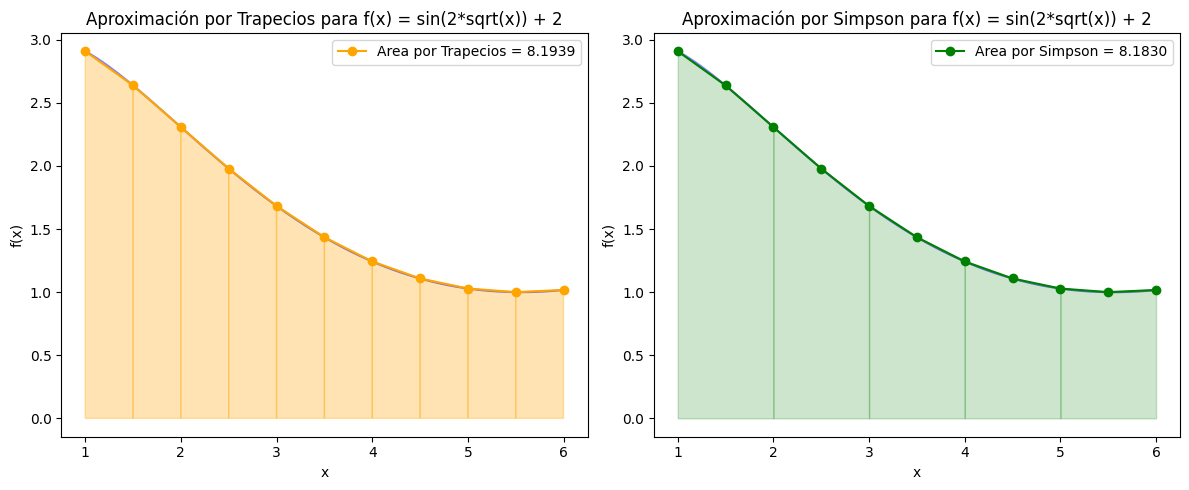

In [5]:
integration_main()



----------------------------------------
POR TRAPECIO: 
∫ sin(x)/x dx = -0.2096692692495497

Tiempo de ejecución 1: 0.0002214380
----------------------------------------
POR SIMPSON: 
∫ sin(x)/x dx = -0.20996140564838067

Tiempo de ejecución 2: 0.0001606360
----------------------------------------


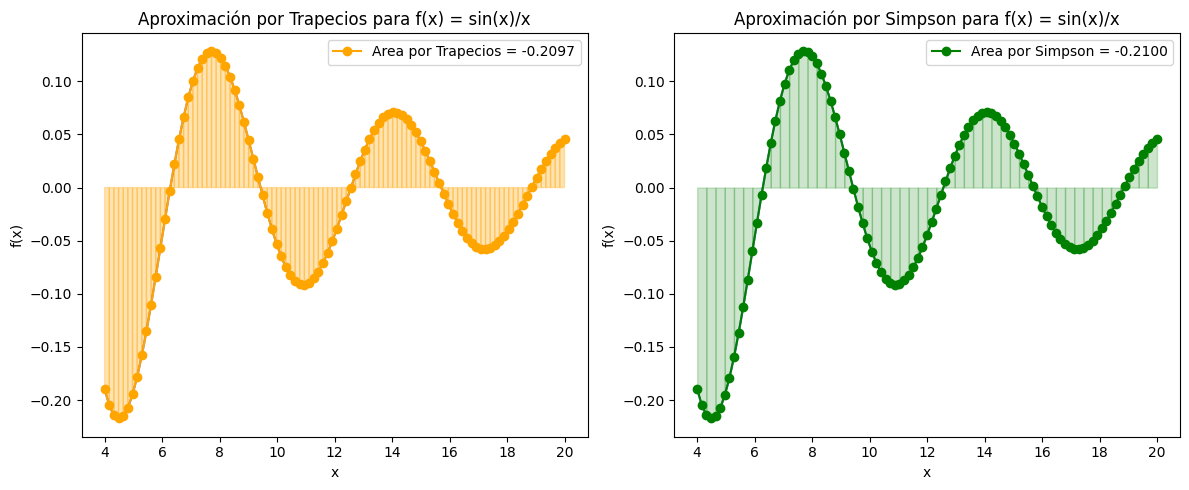

In [6]:
integration_main(function="sin(x)/x", interval=(4,20), subintervals=100,user_console=False)